In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Xm8TCOmIXMgvGr7QK3LX")
project = rf.workspace("cay-0gvyl").project("cloneproject")
version = project.version(7)
dataset = version.download("yolov8")
                

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached python_dotenv-1.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/38.8 MB 26.9 MB/s eta 0:00:02
   -------------- ------------------------- 13.9/38.8 MB 39.6 MB/s eta 0:00:01
   ----------------------------- ---------- 28.6/38.8 MB 49.0 MB/s eta 0:00:01
   ------------------------------------ --- 35.1/38.8 MB 45.5 MB/s eta 0:00:01
   ---------------------------------------  38.5/38.8 MB 43.0 MB/s eta 0:00:01
   ---------------------------------------- 38.8/38.8 MB 36.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   --------- ------------------------------ 2.1/8.6 MB 13.1 MB/s eta 0:00:01
   ---------------------- ----------------- 4.7/8.6 MB 12.4 MB/s eta 0:00:01
   ---------------------


Extracting Dataset Version Zip to CloneProject-7 in yolov8:: 100%|██████████| 1393/1393 [00:41<00:00, 33.19it/s] 


In [2]:
import cv2
import ultralytics


(400, 2000, 3)


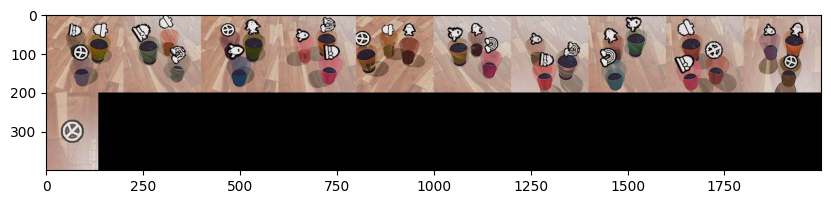

In [6]:
import cv2
import matplotlib.pyplot as plt 

# Đọc ảnh lớn
img = cv2.imread(r'CloneProject-7\train\images\9835266098_jpg.rf.44b8b548246399a93efacc6c48a12eaa.jpg')
print(img.shape)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


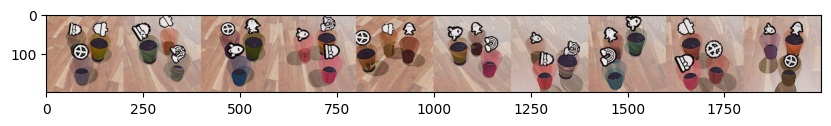

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img[0:200, :], cv2.COLOR_BGR2RGB))


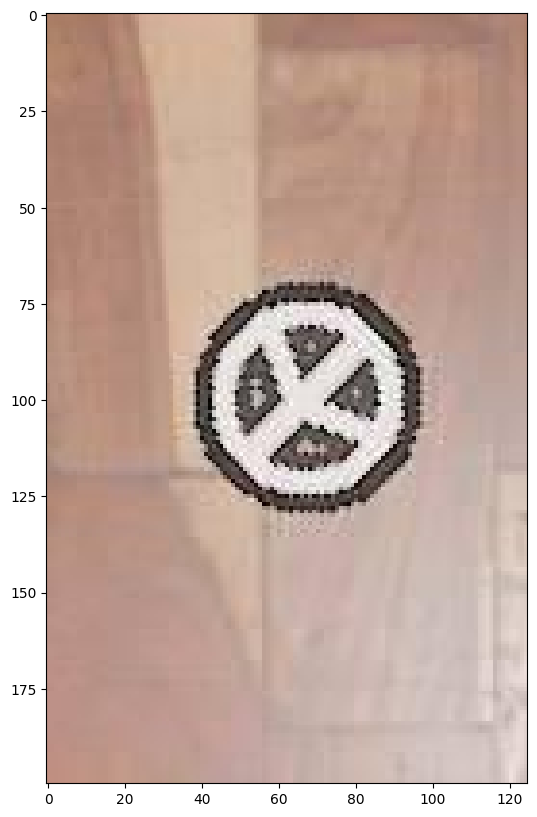

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img[200:400, 0:125], cv2.COLOR_BGR2RGB))


In [12]:
height, width = img.shape[:2]

top_imgs = img[0:200, :]

sub_img_w = width // 10

imgs = []
for i in range(10):
    x1 = i * sub_img_w
    x2 = (i + 1) * sub_img_w
    sub_img = top_imgs[:, x1:x2]
    imgs.append(sub_img)
    cv2.imwrite(f'sub_img_{i+1}.jpg', sub_img)


0: 128x640 31 icons, 100.5ms
Speed: 1.6ms preprocess, 100.5ms inference, 2.2ms postprocess per image at shape (1, 3, 128, 640)


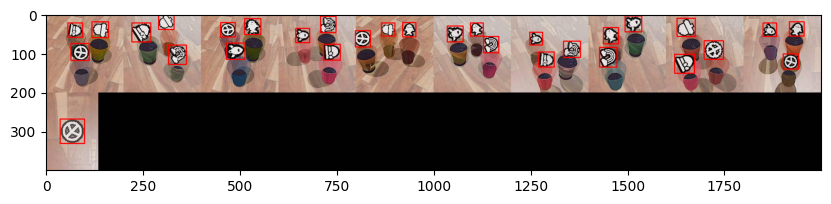

In [ ]:
from ultralytics import YOLO

MODEL_PATH = r'weights\best.pt'  # Thay bằng đường dẫn model của bạn
IMAGE_PATH = r'CloneProject-7\train\images\9835266098_jpg.rf.44b8b548246399a93efacc6c48a12eaa.jpg'  # Thay bằng đường dẫn ảnh captcha

# Load model YOLOv8 đã train
model = YOLO(MODEL_PATH)
img = cv2.imread(IMAGE_PATH)
height, width = img.shape[:2]

icon_request_img = img[200:400, 0:125]

# 2. Cắt 10 ảnh nhỏ phía trên
sub_img_w = width // 10
top_imgs = img[0:200, :]
imgs = [top_imgs[:, i*sub_img_w:(i+1)*sub_img_w] for i in range(10)]

#Detect các icon trên ảnh gốc
results = model(img)
#Vẽ bounding box
for result in results:
    boxes = result.boxes.xyxy
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))





0: 128x640 31 icons, 10.6ms
Speed: 1.0ms preprocess, 10.6ms inference, 2.0ms postprocess per image at shape (1, 3, 128, 640)


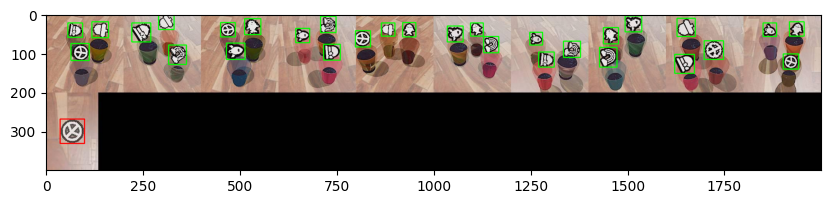

In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np

MODEL_PATH = r'weights\best.pt'  # Thay bằng đường dẫn model của bạn
IMAGE_PATH = r'CloneProject-7\train\images\9835266098_jpg.rf.44b8b548246399a93efacc6c48a12eaa.jpg'  # Thay bằng đường dẫn ảnh captcha

# Load model YOLOv8 đã train
model = YOLO(MODEL_PATH)
img = cv2.imread(IMAGE_PATH)

#Cắt và lưu tọa độ x1,x2 của ảnh con
sub_img_w = width // 10
top_imgs = img[0:200, :]
imgs = [top_imgs[:, i*sub_img_w:(i+1)*sub_img_w] for i in range(10)]
sub_img_coords = [(i*sub_img_w, (i+1)*sub_img_w) for i in range(10)]


# Detect các icon trên ảnh gốc
results = model(img)
#Lưu tọa độ các icon của ảnh con, icon request (icon request là icon có tọa độ nằm trong khoảng img[200:400, 0:125])
img_copy = img.copy()
icon_coords = []
icon_request_coords = []
for result in results:
    boxes = result.boxes.xyxy
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)

        if y1 >= 200 and y2 <= 400 and x1 >= 0 and x2 <= 125:
            icon_request_coords.append((x1, y1, x2, y2))
        else:
            icon_coords.append((x1, y1, x2, y2))

#vẽ bounding box cho các icon, icon request sẽ đánh màu xanh
for icon_request_coord in icon_request_coords:
    cv2.rectangle(img, (icon_request_coord[0], icon_request_coord[1]), (icon_request_coord[2], icon_request_coord[3]), (0, 0, 255), 2)

for icon_coord in icon_coords:
    cv2.rectangle(img, (icon_coord[0], icon_coord[1]), (icon_coord[2], icon_coord[3]), (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))







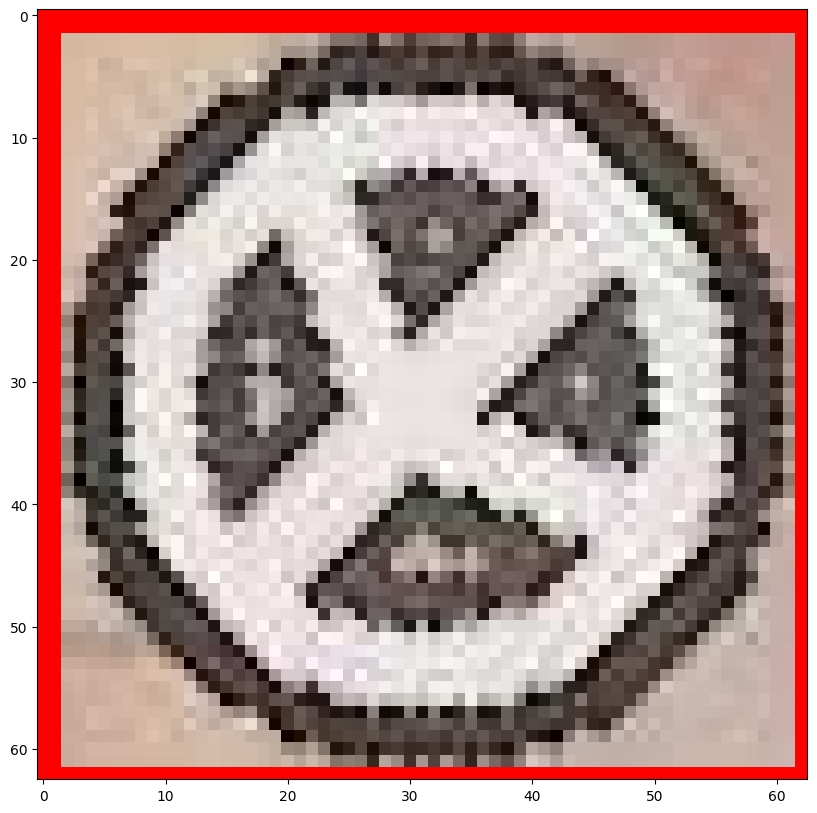

In [27]:
x1, y1, x2, y2 = icon_request_coords[0]
icon_request_img = img[y1:y2, x1:x2]

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(icon_request_img, cv2.COLOR_BGR2RGB))

